# Current

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
folder_path = "C:/Users/qhrrl/CodeExamples/3.Paper/0.Dataset"

In [3]:
pd_cur_train_origin = pd.read_csv(folder_path + '/cur_training_all.csv')
pd_cur_val_origin = pd.read_csv(folder_path + '/cur_validation_all.csv')

In [4]:
print(pd_cur_train_origin.shape)
print(len(pd_cur_train_origin))
print(len(pd_cur_val_origin))

(305534, 48)
305534
38210


In [5]:
np_cur_train = pd_cur_train_origin.to_numpy()
np_cur_val = pd_cur_val_origin.to_numpy()

# Extract Labels

In [6]:
train_labels = np_cur_train[:,-1]
val_labels = np_cur_val[:, -1]

In [7]:
pd_cur_train = pd_cur_train_origin.drop(columns = ['Date','WATT','LABEL'])
pd_cur_val = pd_cur_val_origin.drop(columns = ['Date','WATT','LABEL'])

In [8]:
np_cur_train = pd_cur_train.to_numpy()
np_cur_val = pd_cur_val.to_numpy()

# 1. Current

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np_cur_train, train_labels, stratify=train_labels, test_size=0.2, random_state=42)

In [10]:
print(x_train.shape)
print(x_test.shape)

print("="*50)

print(y_train.shape)
print(y_test.shape)

print("="*50)

x_valid = np_cur_val
y_valid = val_labels

print(x_valid.shape)
print(y_valid.shape)

(244427, 45)
(61107, 45)
(244427,)
(61107,)
(38210, 45)
(38210,)


# 1. 시각화

# 100%

## 1.1 데이터 status 확인

In [107]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))  # classes = array([-1,  1])
classes

array([0, 1, 2, 3, 4], dtype=object)

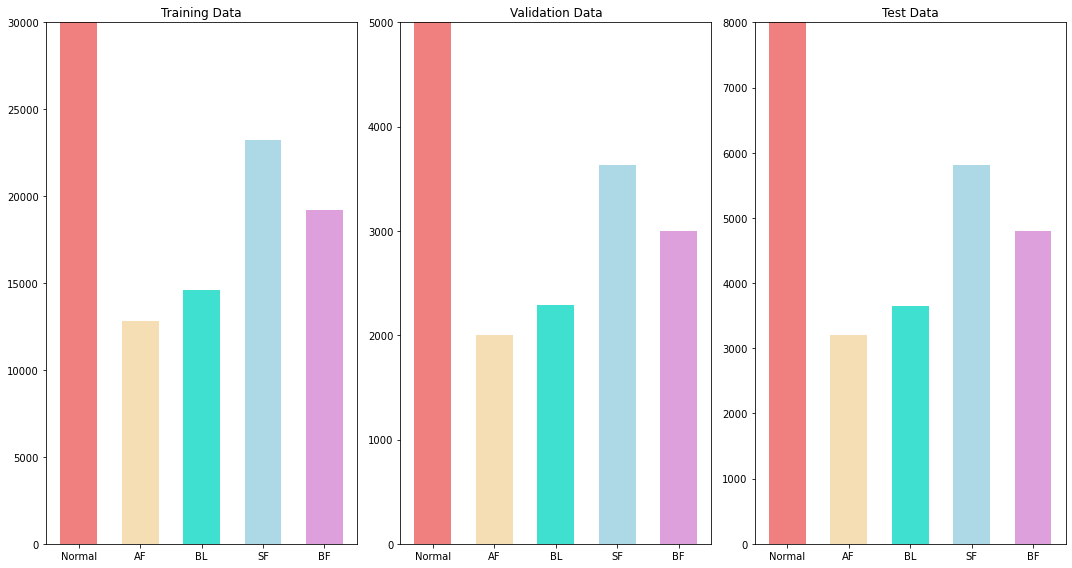

In [108]:
x = np.arange(len(classes))  # Plot의 X축의 개수 구하기

labels = ["Normal", "AF", "BL", "SF", "BF"]   # Plot의 X축의 이름 구하기

values_train = [(y_train == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(y_test == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(15,8))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 30000])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6,color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 5000])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 8000])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig('./imgs/100%_data_status.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력

In [ ]:
class AdjustingNumber():
    def __init__(self):
        pass
    def 

In [ ]:
def 

## 1.2 99 : 1 으로 데이터 숫자 조정

In [109]:
print(pd_cur_train_origin.shape)
print(pd_cur_val_origin.shape)

(305534, 48)
(38210, 48)


In [110]:
lb_t_1 = [] # label_training_1
lb_t_2 = []
lb_t_3 = []
lb_t_4 = []

lb_v_1 = []
lb_v_2 = []
lb_v_3 = []
lb_v_4 = []

In [111]:
np_tr_99 = pd_cur_train_origin.to_numpy()
np_v_99 = pd_cur_val_origin.to_numpy()

In [112]:
def label_extract(data):
    lb_1 = []
    lb_2 = []
    lb_3 = []
    lb_4 = []
    lb_0 = []
    for i in data:
        if i[:][-1] == 1:
            lb_1.append(i)
        elif i[:][-1] == 2:
            lb_2.append(i)
        elif i[:][-1] == 3:
            lb_3.append(i)
        elif i[:][-1] == 4:
            lb_4.append(i)
        elif i[:][-1] == 0:
            lb_0.append(i)
    return lb_1, lb_2, lb_3, lb_4, lb_0

In [113]:
lb_t_1, lb_t_2, lb_t_3, lb_t_4, lb_t_0 = label_extract(np_tr_99)
lb_v_1, lb_v_2, lb_v_3, lb_v_4, lb_v_0 = label_extract(np_v_99)

In [114]:
print((len(pd_cur_train_origin)) == (len(lb_t_1) + len(lb_t_2)+len(lb_t_3) + len(lb_t_4) + len(lb_t_0)))
print((len(pd_cur_val_origin)) == (len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4) + len(lb_v_0)))

True
True


In [115]:
print(len(lb_t_0) * 0.01)

2181.94


반올림해서 0.4 제거 후 30553 중에서 4개의 유형으로 쪼개야 하니 

In [116]:
split_n = int(len(lb_t_0) * 0.01 / 4)
print(split_n)

545


각 데이터 당, 545 개 씩 추출을 해야한다.

In [117]:
import random

lb_t_1 = random.sample(lb_t_1, split_n)
lb_t_2 = random.sample(lb_t_2, split_n)
lb_t_3 = random.sample(lb_t_3, split_n)
lb_t_4 = random.sample(lb_t_4, split_n)

In [118]:
print(len(lb_t_1))

545


In [119]:
# 비교해보자 
print(len(lb_t_0) * 0.01)
print(len(lb_t_1) + len(lb_t_2)+len(lb_t_3) + len(lb_t_4))

2181.94
2180


다시 붙여주자 

In [120]:
pd_lb_t_0 = pd.DataFrame(lb_t_0)
pd_lb_t_1 = pd.DataFrame(lb_t_1)
pd_lb_t_2 = pd.DataFrame(lb_t_2)
pd_lb_t_3 = pd.DataFrame(lb_t_3)
pd_lb_t_4 = pd.DataFrame(lb_t_4)

cur_train_99 = pd.concat([pd_lb_t_0, pd_lb_t_1, pd_lb_t_2, pd_lb_t_3, pd_lb_t_4], axis=0)

In [121]:
cur_train_99

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2020-11-13 07:43:41,3.643555,3.883789,4.124023,2.152260,2.154582,2.290735,7.126953,7.527344,7.687500,...,3.553066,3.763136,0.021705,0.023957,0.020911,0.057528,0.057195,0.057517,2.2,0
1,2020-11-13 07:43:41,3.643555,3.803711,4.164062,2.161249,2.163811,2.301946,7.126953,7.447266,7.727539,...,3.533756,3.747315,0.009876,0.010175,0.010687,0.011616,0.013211,0.010941,2.2,0
2,2020-11-13 07:43:41,3.683594,3.803711,4.164062,2.152920,2.151939,2.289333,7.166992,7.367188,7.727539,...,3.519853,3.728701,0.017622,0.011568,0.014016,0.012954,0.016530,0.011328,2.2,0
3,2020-11-13 07:44:42,3.553467,3.753662,3.993896,2.134172,2.111470,2.258483,6.966797,7.247070,7.487305,...,3.359254,3.581625,0.011735,0.008646,0.012069,0.008928,0.008072,0.006405,2.2,0
4,2020-11-13 07:44:42,3.593506,3.713623,4.073975,2.137425,2.114743,2.260646,7.006836,7.247070,7.607422,...,3.354816,3.573826,0.007737,0.006841,0.007718,0.011826,0.016674,0.015070,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2020-11-07 03:13:14,4.033936,4.294189,4.194092,2.397589,2.465625,2.425016,8.007812,8.568359,8.328125,...,3.902610,3.798646,0.032300,0.030071,0.032492,0.033725,0.022434,0.018605,2.2,4
541,2021-01-30 14:07:54,4.043945,4.364258,4.083984,2.158866,2.250416,2.147936,7.887695,8.208008,7.807617,...,3.625128,3.450163,0.028192,0.029124,0.032243,0.010171,0.005139,0.008097,2.2,4
542,2020-11-06 23:19:07,4.234131,4.554443,4.494385,2.420001,2.512211,2.449229,8.448242,9.048828,8.848633,...,4.272649,4.129838,0.035321,0.034757,0.034172,0.027232,0.025861,0.037477,2.2,4
543,2021-01-25 13:21:11,4.199097,4.439331,4.159058,2.160803,2.228754,2.110304,8.167969,8.448242,7.927734,...,3.795615,3.580923,0.036073,0.031376,0.034660,0.007270,0.020582,0.008401,2.2,4


In [122]:
cur_train_99.columns = [
        'Date',
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness', 'T_Skewness', 'R_Kurtosis', 'S_Kurtosis', 'T_Kurtosis',
        'R_Crest', 'S_Crest', 'T_Crest', 'R_Shape', 'S_Shape', 'T_Shape',
        'R_Impulse', 'S_Impulse', 'T_Impulse',
        'RS_phase', 'ST_phase', 'TR_phase', 'RS_Level', 'ST_Level', 'TR_Level',
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
        'WATT','LABEL'
        ]

In [123]:
cur_train_99.head(3)

,Date,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,...,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,WATT,LABEL
0,2020-11-13 07:43:41,3.643555,3.883789,4.124023,2.152260,2.154582,2.290735,7.126953,7.527344,7.687500,...,3.553066,3.763136,0.021705,0.023957,0.020911,0.057528,0.057195,0.057517,2.2,0
1,2020-11-13 07:43:41,3.643555,3.803711,4.164062,2.161249,2.163811,2.301946,7.126953,7.447266,7.727539,...,3.533756,3.747315,0.009876,0.010175,0.010687,0.011616,0.013211,0.010941,2.2,0
2,2020-11-13 07:43:41,3.683594,3.803711,4.164062,2.152920,2.151939,2.289333,7.166992,7.367188,7.727539,...,3.519853,3.728701,0.017622,0.011568,0.014016,0.012954,0.016530,0.011328,2.2,0


# CUR ____ TR

In [124]:
print(len(pd_cur_val_origin))
print(len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4) + len(lb_v_0))

38210
38210


In [125]:
split_n = int((len(lb_v_0) * 0.01) / 4)
print(split_n)

68


In [126]:
lb_v_1 = random.sample(lb_v_1, split_n)
lb_v_2 = random.sample(lb_v_2, split_n)
lb_v_3 = random.sample(lb_v_3, split_n)
lb_v_4 = random.sample(lb_v_4, split_n)

In [127]:
len(lb_v_1)

68

In [128]:
# 비교해보자 
print(len(lb_v_0) * 0.01)
print(len(lb_v_1) + len(lb_v_2)+len(lb_v_3) + len(lb_v_4))

272.85
272


In [129]:
pd_lb_v_0 = pd.DataFrame(lb_v_0)
pd_lb_v_1 = pd.DataFrame(lb_v_1)
pd_lb_v_2 = pd.DataFrame(lb_v_2)
pd_lb_v_3 = pd.DataFrame(lb_v_3)
pd_lb_v_4 = pd.DataFrame(lb_v_4)

cur_val_99 = pd.concat([pd_lb_v_0, pd_lb_v_1, pd_lb_v_2, pd_lb_v_3, pd_lb_v_4], axis=0)

In [130]:
cur_val_99

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2020-11-04 20:12:54,3.793701,3.793701,4.154053,2.205342,2.169747,2.309003,7.327148,7.447266,7.727539,...,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
1,2020-11-04 20:12:54,3.673584,3.793701,4.154053,2.201408,2.165643,2.310865,7.207031,7.367188,7.687500,...,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
2,2020-11-04 20:12:54,3.673584,3.833740,4.154053,2.197003,2.162560,2.308042,7.207031,7.407227,7.727539,...,3.443272,3.664395,0.013236,0.011662,0.011017,0.014893,0.014687,0.008664,2.2,0
3,2020-11-04 20:13:52,3.803711,3.803711,4.164062,2.205392,2.169797,2.309413,7.327148,7.447266,7.727539,...,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
4,2020-11-04 20:13:52,3.683594,3.803711,4.164062,2.201448,2.165733,2.311195,7.207031,7.367188,7.687500,...,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2021-01-20 12:52:25,4.038940,4.319214,3.878784,2.195942,2.277137,2.138111,7.887695,8.087891,7.367188,...,3.669950,3.428202,0.029198,0.032240,0.034296,0.009194,0.009900,0.009302,2.2,4
64,2020-11-04 06:19:57,4.154053,4.394287,4.374268,2.380763,2.431192,2.396728,8.288086,8.688477,8.688477,...,3.969910,3.888483,0.017612,0.018606,0.014572,0.015888,0.009842,0.015826,2.2,4
65,2020-11-06 01:18:18,4.144043,4.384277,4.384277,2.411433,2.457077,2.412434,8.288086,8.728516,8.568359,...,3.880025,3.776680,0.024243,0.023855,0.023777,0.024182,0.021696,0.025457,2.2,4
66,2021-01-20 17:18:57,4.204102,4.404297,4.164062,2.160868,2.239585,2.120008,8.167969,8.328125,7.967773,...,3.665963,3.455095,0.027946,0.031548,0.029994,0.007724,0.007157,0.006435,2.2,4


In [131]:
cur_val_99.columns = [
        'Date',
        'R_AbsMax', 'S_AbsMax', 'T_AbsMax', 'R_AbsMean', 'S_AbsMean','T_AbsMean',
        'R_P2P', 'S_P2P', 'T_P2P', 'R_RMS', 'S_RMS', 'T_RMS', 
        'R_Skewness', 'S_Skewness', 'T_Skewness', 'R_Kurtosis', 'S_Kurtosis', 'T_Kurtosis',
        'R_Crest', 'S_Crest', 'T_Crest', 'R_Shape', 'S_Shape', 'T_Shape',
        'R_Impulse', 'S_Impulse', 'T_Impulse',
        'RS_phase', 'ST_phase', 'TR_phase', 'RS_Level', 'ST_Level', 'TR_Level',
        'R_1x', 'S_1x', 'T_1x', 'R_2x', 'S_2x', 'T_2x',
        'R_3x', 'S_3x', 'T_3x', 'R_4x', 'S_4x', 'T_4x',
        'WATT','LABEL'
        ]

In [132]:
cur_val_99.head(3)

,Date,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,...,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x,WATT,LABEL
0,2020-11-04 20:12:54,3.793701,3.793701,4.154053,2.205342,2.169747,2.309003,7.327148,7.447266,7.727539,...,3.417413,3.626784,0.011671,0.012673,0.015285,0.014712,0.013995,0.008425,2.2,0
1,2020-11-04 20:12:54,3.673584,3.793701,4.154053,2.201408,2.165643,2.310865,7.207031,7.367188,7.687500,...,3.443414,3.666574,0.007045,0.007379,0.006799,0.006815,0.015612,0.010616,2.2,0
2,2020-11-04 20:12:54,3.673584,3.833740,4.154053,2.197003,2.162560,2.308042,7.207031,7.407227,7.727539,...,3.443272,3.664395,0.013236,0.011662,0.011017,0.014893,0.014687,0.008664,2.2,0


In [133]:
print(cur_train_99.shape)
print(cur_val_99.shape)

(220374, 48)
(27557, 48)


In [134]:
pd_cur_tr_99 = cur_train_99.drop(columns = ['Date','WATT','LABEL'])
pd_cur_val_99 = cur_val_99.drop(columns = ['Date','WATT','LABEL'])

np_cur_tr_99 = pd_cur_tr_99.to_numpy()
np_cur_val_99 = pd_cur_val_99.to_numpy()

In [135]:
#라벨 추출
np_tr_99 = cur_train_99.to_numpy()
np_vl_99 = cur_val_99.to_numpy()

In [136]:
tr_lb_99 = np_tr_99[:,-1]
v_lb_99 = np_vl_99[:, -1]

print(cur_tr_lb_99)
print(cur_vl_lb_99)

[0 0 0 ... 4 4 4]
[0 0 0 ... 4 4 4]


In [137]:
x_train_99, x_test_99, y_train_99, y_test_99 = train_test_split(np_tr_99, tr_lb_99, stratify= tr_lb_99, test_size=0.2, random_state=42)

In [138]:
print(x_train_99.shape)
print(x_test_99.shape)

print("="*50)

print(y_train_99.shape)
print(y_test_99.shape)

print("="*50)

x_valid = np_cur_val_99
y_valid = v_lb_99

print(x_valid.shape)
print(y_valid.shape)

(176299, 48)
(44075, 48)
(176299,)
(44075,)
(27557, 45)
(27557,)


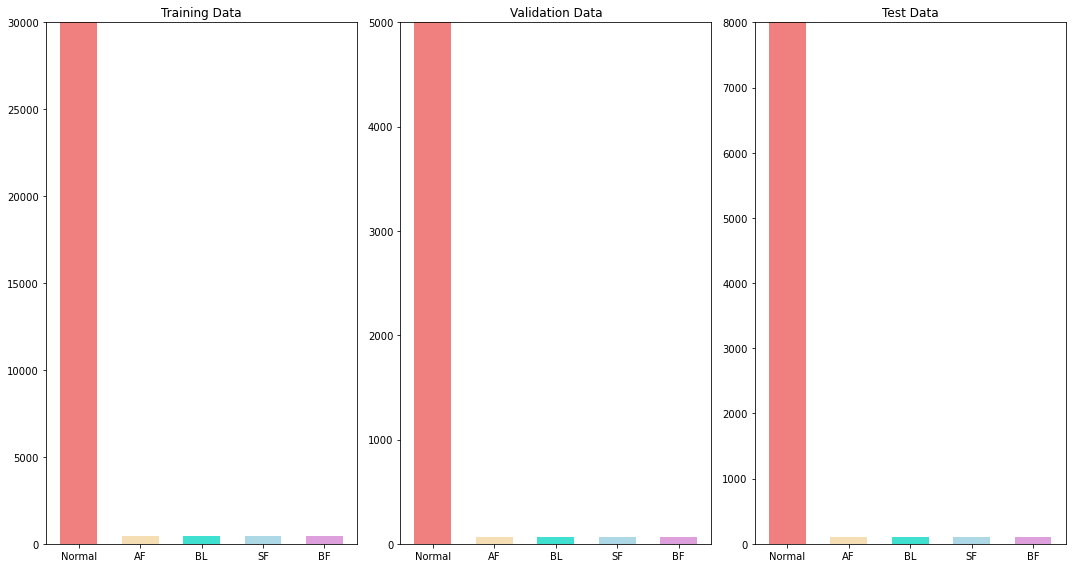

In [139]:
x = np.arange(len(classes))  # Plot의 X축의 개수 구하기

labels = ["Normal", "AF", "BL", "SF", "BF"]   # Plot의 X축의 이름 구하기

values_train = [(y_train_99 == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(y_test_99 == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(15,8))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 30000])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6,color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 5000])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["lightcoral", "wheat","turquoise","lightblue","plum"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 8000])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig('./imgs/99%_data_status.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력